In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext tensorboard

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, kernel_initializer = "he_normal"),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(100, kernel_initializer = "he_normal"),
          tf.keras.layers.LeakyReLU(),
          tf.keras.layers.Dense(10, activation="softmax")]

In [ ]:
model = tf.keras.Sequential(LAYERS)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.5456 - accuracy: 0.5981 - val_loss: 0.9718 - val_accuracy: 0.7956
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7623 - accuracy: 0.8235 - val_loss: 0.5998 - val_accuracy: 0.8558
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5499 - accuracy: 0.8591 - val_loss: 0.4768 - val_accuracy: 0.8762
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4654 - accuracy: 0.8753 - val_loss: 0.4169 - val_accuracy: 0.8900
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4197 - accuracy: 0.8855 - val_loss: 0.3807 - val_accuracy: 0.8964
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3902 - accuracy: 0.8923 - val_loss: 0.3567 - val_accuracy: 0.9016
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3691 - accuracy: 0.8973 - val_loss: 0.3387 - val_accuracy

#Batch Normalization

In [ ]:
del model

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation = 'relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation = 'relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax")]

In [ ]:
model = tf.keras.Sequential(LAYERS)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [ ]:
784 * 4 # mean, variance, gamma and beta, gamma and beta are trainable

3136

In [ ]:
300 * 4

1200

In [ ]:
100 * 4

400

In [ ]:
3136 + 1200 + 400

4736

In [ ]:
4736 / 2

2368.0

In [ ]:
267410 + 2368

269778

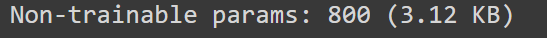

In [ ]:
# mean, variance = non trainable, not a part of backpropagation

In [ ]:
bn1 = model.layers[1]
bn1

In [ ]:
for variable in bn1.variables:
  print(variable.name, variable.trainable)

batch_normalization/gamma:0 True
batch_normalization/beta:0 True
batch_normalization/moving_mean:0 False
batch_normalization/moving_variance:0 False


In [ ]:
  model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
                metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 5ms/step - loss: 0.8409 - accuracy: 0.7394 - val_loss: 0.4492 - val_accuracy: 0.8708
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4292 - accuracy: 0.8754 - val_loss: 0.3357 - val_accuracy: 0.9026
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3504 - accuracy: 0.8984 - val_loss: 0.2860 - val_accuracy: 0.9142
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3065 - accuracy: 0.9110 - val_loss: 0.2579 - val_accuracy: 0.9218
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2779 - accuracy: 0.9189 - val_loss: 0.2355 - val_accuracy: 0.9284
Epoch 6/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2559 - accuracy: 0.9271 - val_loss: 0.2210 - val_accuracy: 0.9320
Epoch 7/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2400 - accuracy: 0.9299 - val_loss: 0.2091 - val_accura

## Batch Normalization Aproach two

In [ ]:
del model

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28]),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, use_bias=False),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, use_bias = False),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax")]

In [ ]:
model = tf.keras.Sequential(LAYERS)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.1246 - accuracy: 0.6727 - val_loss: 0.6097 - val_accuracy: 0.8518
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5755 - accuracy: 0.8553 - val_loss: 0.4313 - val_accuracy: 0.8906
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4555 - accuracy: 0.8827 - val_loss: 0.3550 - val_accuracy: 0.9072
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3931 - accuracy: 0.8954 - val_loss: 0.3126 - val_accuracy: 0.9150
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3525 - accuracy: 0.9048 - val_loss: 0.2825 - val_accuracy: 0.9234
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3250 - accuracy: 0.9113 - val_loss: 0.2608 - val_accuracy: 0.9262
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3027 - accuracy: 0.9161 - val_loss: 0.2431 - val_accuracy

In [ ]:
model.summary(
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 300)               235200    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 100)              

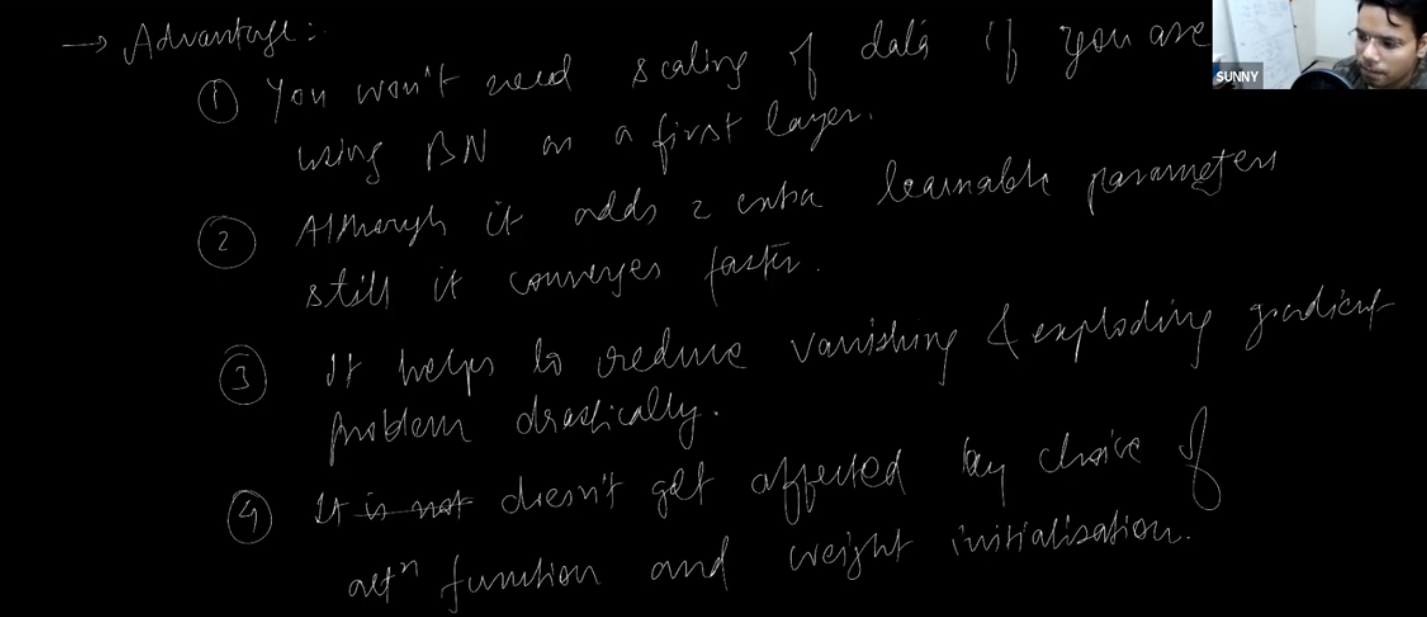

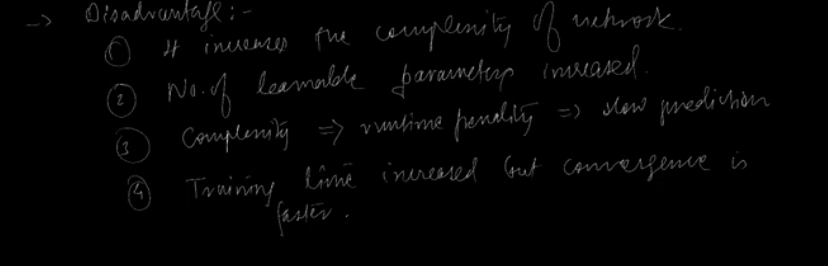